### Methods to remove outliers

1. IQR
2. Z score
3. Percentile

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing and viewing dataset
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
#Checking size of dataset
df.shape

(1338, 7)

In [4]:
#Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
#Statistical distribution
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Detecting outliers 

1. Outliers can be detected using boxplot

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


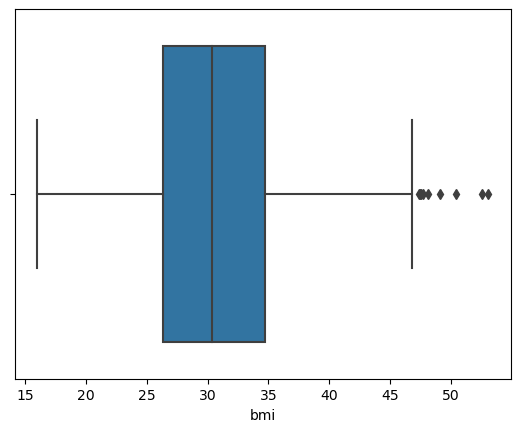

In [6]:
sns.boxplot(df.bmi)
plt.show()

### Outlier replacement with median

1. Since outliers lie beyond Q3, we need to find upper limit.
2. We can find the value and replace values beyond it with median

In [7]:
#Caluclating quartiles of data
q1=df.bmi.quantile(0.25)
q2=df.bmi.quantile(0.50)
q3=df.bmi.quantile(0.75)

In [8]:
#Calculating inter quartile range
iqr=q3-q1
iqr

8.400000000000002

In [9]:
#Calculating upper limit
upper_limit=q3+1.5*iqr
upper_limit

47.300000000000004

In [10]:
#Finding median of dataset
df.median()

/var/folders/ql/xm78crnd19l9q048s8b3qcv00000gn/T/ipykernel_79292/2948897759.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


age           39.00
bmi           30.40
children       1.00
expenses    9382.03
dtype: float64

In [11]:
#Replacing outliers with median values
df['bmi']=np.where(df['bmi']>upper_limit,30,df['bmi'])

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


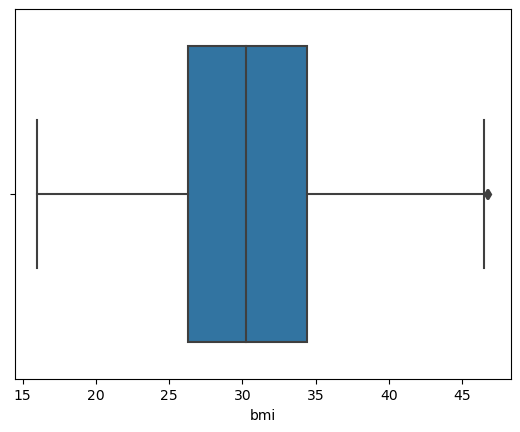

In [12]:
#Removed outliers
sns.boxplot(df.bmi)
plt.show()

### Outlier removal using IQR

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


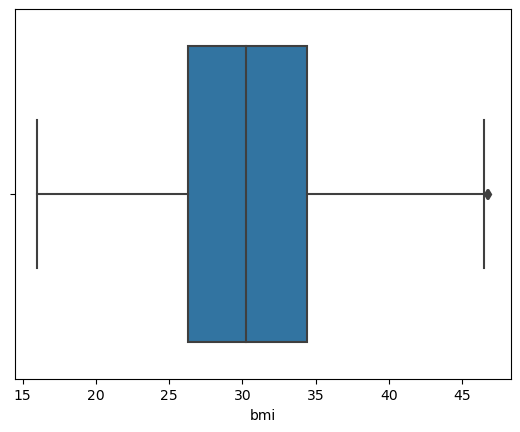

In [13]:
#Boxplot to check for outliers
sns.boxplot(df.bmi)
plt.show()

In [14]:
#Caluclating quartiles of data
q1=df.bmi.quantile(0.25)
q2=df.bmi.quantile(0.50)
q3=df.bmi.quantile(0.75)

In [15]:
#Calculating inter quartile range
iqr=q3-q1
iqr

8.099999999999998

In [16]:
#Calculating upper limit
upper_limit=q3+1.5*iqr
upper_limit

46.55

In [17]:
#Removing values beyond upperlimit
df=df[df.bmi<upper_limit]

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


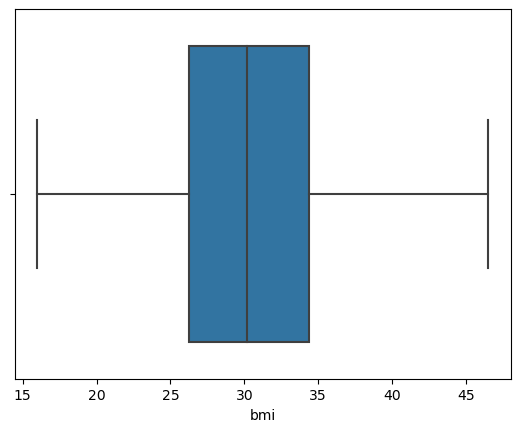

In [18]:
#Checking removal of outliers
sns.boxplot(df.bmi)
plt.show()

### Outlier removal using Z score 

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


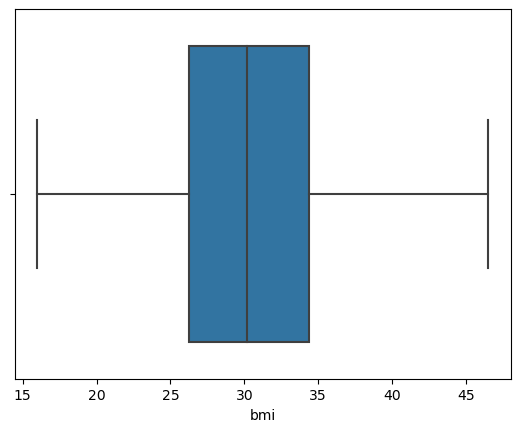

In [19]:
#Boxplot to check for outliers
sns.boxplot(df.bmi)
plt.show()

In [20]:
from scipy import stats

In [21]:
#Finding z score
bmi_zscore=stats.zscore(df.bmi)
bmi_zscore

0      -0.444963
1       0.560303
2       0.423996
3      -1.330960
4      -0.274579
          ...   
1333    0.083228
1334    0.236574
1335    1.088494
1336   -0.802769
1337   -0.240502
Name: bmi, Length: 1336, dtype: float64

In [22]:
#Finding absolute values of bmi_zscore less than 3
df_z=df[np.abs(bmi_zscore)<=3]
df_z

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


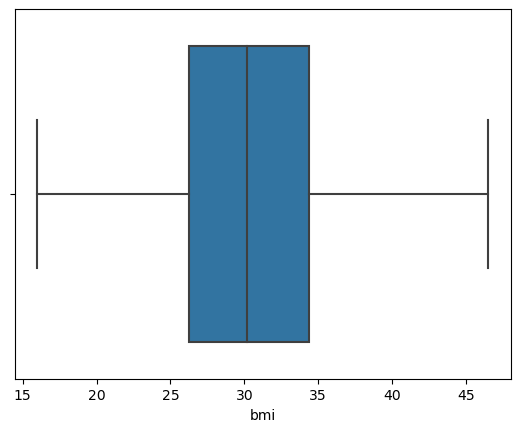

In [23]:
#Checking removed outliers
sns.boxplot(df_z.bmi)
plt.show()

### Removal of outerliers using percentile method 

/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


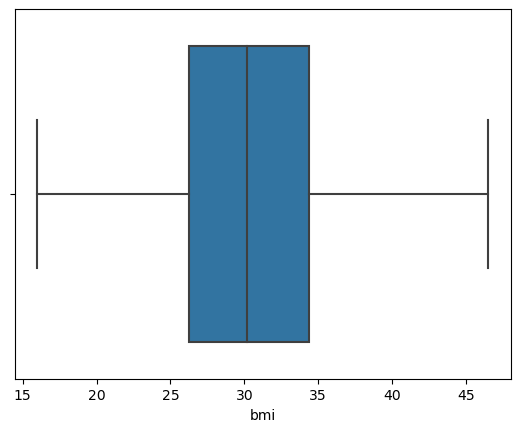

In [24]:
#Boxplot to check for outliers
sns.boxplot(df.bmi)
plt.show()

In [25]:
#Calculating 99 percentile 
p99=df.bmi.quantile(0.99)
p99

44.2

In [26]:
df=df[df.bmi<=p99]
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


/Users/casarulez/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


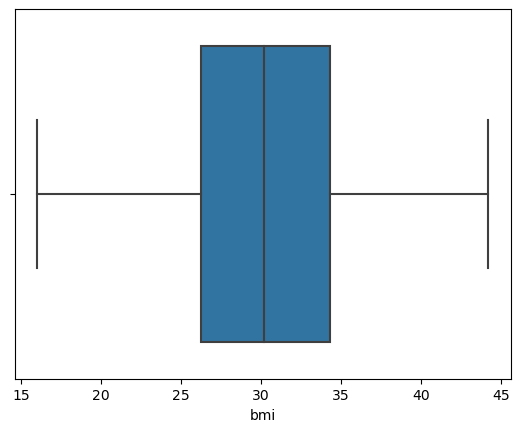

In [27]:
#Boxplot to check removal of outliers
sns.boxplot(df.bmi)
plt.show()